# Introduction

# Introduction

YouTube recommendations can sometimes lead to surprisingly insightful videos. One such example is the video [The BEST Way to Find a Random Point in a Circle](https://www.youtube.com/watch?v=4y_nmpv-9lI&list=WL&index=5) by *nubDotDev*, which was originally submitted to [3blue1brown's](https://www.youtube.com/@3blue1brown) [Summer of Math Exposition](https://www.3blue1brown.com/blog/some1). This video addresses an interesting problem: How would you write an algorithm to sample points uniformly within a circle?

![Uniformly sampled points inside a circle](images/uniform.png)

Before reading this post, I recommend watching the video, as it covers rejection sampling and polar coordinate methods to solve this problem. In the following sections, I will present another solution that neither relies on rejection sampling nor polar coordinates, but instead utilizes the equation of a circle directly. Why would you want to know about all this? I'm not sure, but maybe this simple problem stimulates your curiosity like it did for me, so I recommend doing it for this purpose alone.

# Uniform Sampling

## Naive Approach

The equation for a circle of radius $r$ centered at the origin is given by:

$$
y^2 + x^2 = r^2
$$ {#eq-r}

Using @eq-r, random points on the circumference of a circle can be sampled by selecting random values for $x \in [0,r]$ and calculating the corresponding $y$) value (or vice versa). However, @eq-r yields all points on a circle of a specified radius, whereas our objective is to sample uniformly from the entire area within the circle. This can be achieved by additionally sampling the radius as $r_{\text{sampled}} \in [0,r]$. To summarize, the following procedure can be followed *as out first attempt* to sample points uniformly within a circle of radius $r = 1$:

1. Sample $r_{\text{sampled}} \in [0,1]$
2. Sample $x \in [0, r_{\text{sampled}}]$
3. Calculate $y$ (@eq-r)
4. Plot the point $(x,y)$


To keep the code simple, we'll just create a quarter circle, that is use $x,y \in [0,1]$.

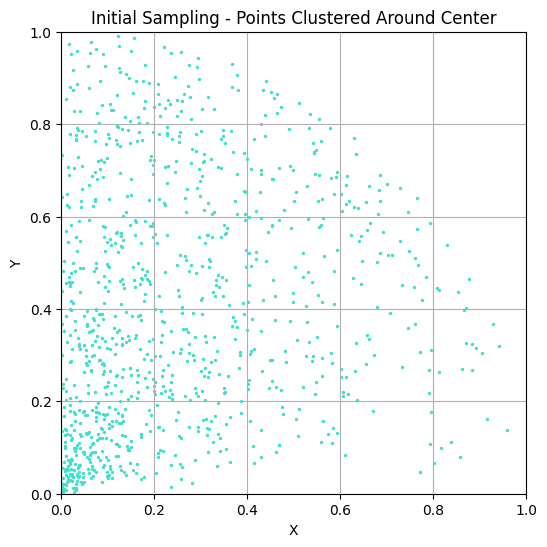

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Number of points to sample
num_points = 1000

# Arrays to store the sampled points
x_points = []
y_points = []

for _ in range(num_points):
    r = np.random.uniform(0, 1)
    x = np.random.uniform(0, r)
    y = np.sqrt(r**2 - x**2)
    x_points.append(x)
    y_points.append(y)

# Plotting the points
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='turquoise', s=2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Initial Sampling - Points Clustered Around Center')
plt.grid(True)
plt.show()


## Circumference sampling

This method is simple, but it has a couple of problems, resulting in a non-uniform density of points. The most obvious problem is, that the points are denser around the circles' center. The problem arises because the circumference of the circle grows with $r_{\text{sampled}}$ but the number of samples $k$ doesn't, as shown in this image.

![As the circumference grows, the number of samples remains the same, resulting in a non-uniform density of samples.](images/circumference.png)

To fix this, we can simply generate more points as the circle grows. Specifically, we'll use the circumference $c$ as a scaling factor.

$$
c = 2 \pi r_{\text{sampled}}
$$ {#eq-c}

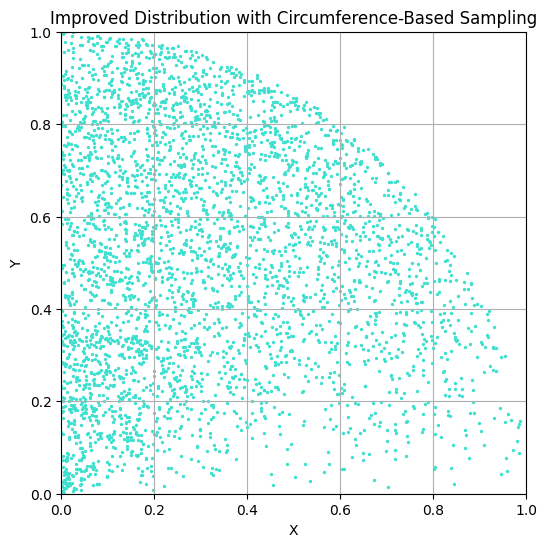

In [2]:
def points_based_on_circumference(r, scale=1):
    return int(np.ceil(2 * np.pi * r * scale))

x_points = []
y_points = []
num_radii = 1000

for _ in range(num_radii):
    r = np.random.uniform(0, 1)
    num_points = points_based_on_circumference(r)
    for _ in range(num_points):
        x = np.random.uniform(0, r)
        y = np.sqrt(r**2 - x**2)
        x_points.append(x)
        y_points.append(y)

plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='turquoise', s=2)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Improved Distribution with Circumference-Based Sampling')
plt.grid(True)
plt.show()


## Inverse

Now we notice the second problem: It seems like there are fewer points on the bottom of the circle. To explain what's going on, it's easier to look at a single circle generated with this approach.

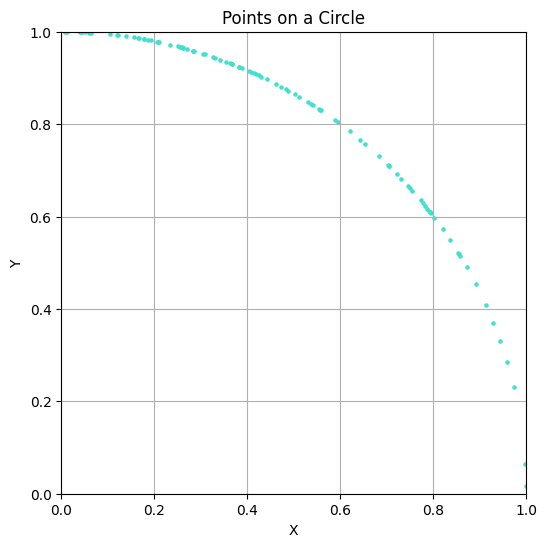

In [17]:
#| code-fold: true

# Number of points to sample
num_points = 100

# Arrays to store the sampled points
x_points = []
y_points = []

for _ in range(num_points):
    # Sample r from [0, 1]
    r = 1

    # Sample x from [0, r]
    x = np.random.uniform(0, r)

    # Calculate y based on the circle formula X^2 + Y^2 = r^2
    y = np.sqrt(r**2 - x**2)


    # Append the point to the arrays
    x_points.append(x)
    y_points.append(y)

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='turquoise', s=5)

# Set the limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points on a Circle')
plt.grid(True)

# Show the plot
plt.show()

Because the circle is drawn by calculating $y$ via $x$, which is uniformly sampled, there are simply more values on the "roof" of the circle than on the side, because from the perspective of $x$, the area is wider. We can fix t his problem by also considering the perspective of $y$, that is inverting $x$ and $y$ by chance.

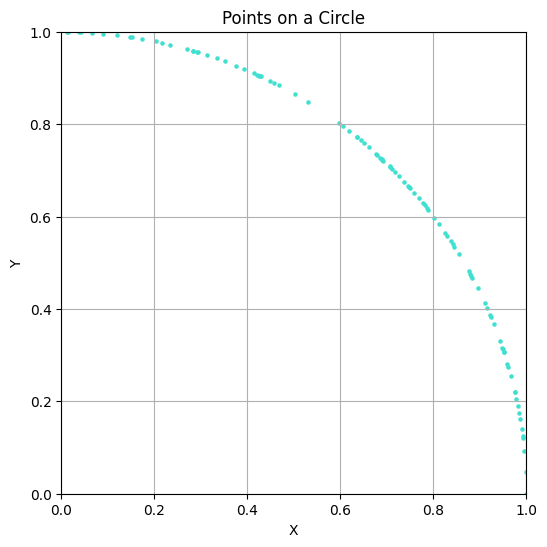

In [18]:
import random

# Number of points to sample
num_points = 100

# Arrays to store the sampled points
x_points = []
y_points = []

for _ in range(num_points):
    # Sample r from [0, 1]
    r = 1

    if random.random() < 0.5:
      # Sample x from [0, r]
      x = np.random.uniform(0, r)

      # Calculate y based on the circle formula X^2 + Y^2 = r^2
      y = np.sqrt(r**2 - x**2)
    else:
      y = np.random.uniform(0, r)
      x = np.sqrt(r**2 - y**2)


    # Append the point to the arrays
    x_points.append(x)
    y_points.append(y)

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='turquoise', s=5)

# Set the limits and labels
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points on a Circle')
plt.grid(True)

# Show the plot
plt.show()

## Full circle

Using the $c$ as a factor for the number of samples $k$ and by inversing $x$ and $y$ by chance, we can finally generate a full circle. This is done by sampling $x \in [-r_{\text{sampled}}, r_{\text{sampled}}]$ and mirroring the point on the x-axis by chance.

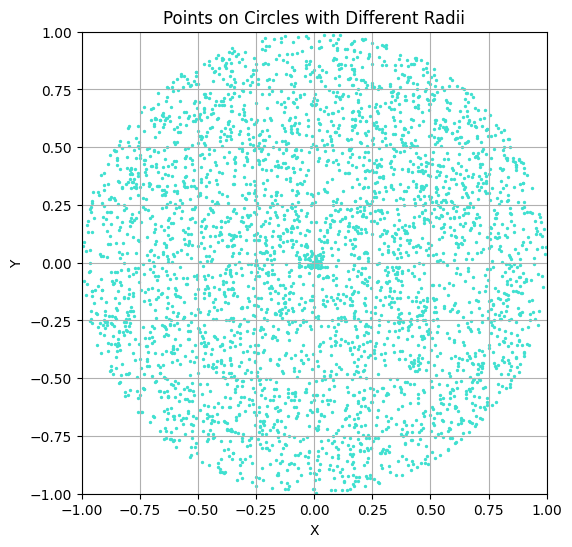

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Function to determine the number of points based on the circumference
def points_based_on_circumference(r, scale=1):
    return int(np.ceil(2 * np.pi * r * scale))

# Arrays to store the sampled points
x_points = []
y_points = []

# Number of different radii to sample
num_radii = 1000

for _ in range(num_radii):
    # Sample r from [0, 1]
    r = np.random.uniform(0, 1)

    # Number of points to sample for this radius
    num_points = points_based_on_circumference(r)

    for _ in range(num_points):
        if random.random() < 0.5:
          # Sample x from [0, r]
          x = np.random.uniform(-r, r)

          # Calculate y based on the circle formula X^2 + Y^2 = r^2
          y = np.sqrt(r**2 - x**2)
          if np.random.rand() > 0.5:
            y = -y
        else:
          y = np.random.uniform(-r, r)
          x = np.sqrt(r**2 - y**2)

          if np.random.rand() > 0.5:
            x = -x

        # Randomly decide the sign of y to cover both the top and bottom halves


        # Append the point to the arrays
        x_points.append(x)
        y_points.append(y)

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='turquoise', s=2)

# Set the limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points on Circles with Different Radii')
plt.grid(True)

# Show the plot
plt.show()

With a bit more refactoring, we can also make the code more compact and reusable.

In [31]:
#| code-fold: true
#| code-summary: "Refactored code"

import matplotlib.pyplot as plt
import numpy as np
import math

target_r = 10

r_granularity = 500
c_granularity = 1

# Function to determine the number of points based on the circumference
def points_based_on_circumference(r, granularity):
    return int(np.ceil(2 * np.pi * r * granularity))

# Arrays to store the sampled points
x_points = []
y_points = []

# Number of different radii to sample
for _ in range(r_granularity):
    r = np.random.uniform(0, target_r)

    # Number of points to sample for this radius
    num_points = points_based_on_circumference(r, c_granularity)

    for _ in range(num_points):
        # Sample and calculate vars
        dep = np.random.uniform(-r, r)
        indep = np.sqrt(r**2 - dep**2)

        # Mirror on x-axis
        if np.random.rand() > 0.5:
          indep = -indep

        # Assign indep. and dep. var
        x, y = (dep, indep) if np.random.rand() > 0.5 else (indep, dep)

        # Append the point to the arrays
        x_points.append(x)
        y_points.append(y)

## Blurring the lines

However, with this approach, we will encounter a final problem. For small values of `r_granularity`, it becomes clear that the points are sampled on separate circles.

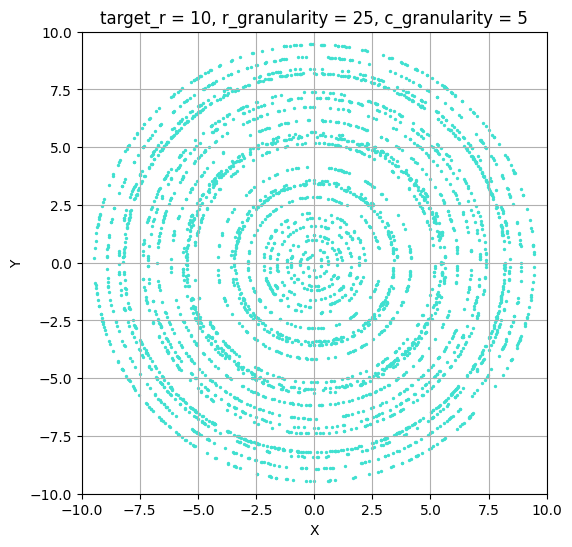

In [26]:
#| code-fold: true

target_r = 10

r_granularity = 25
c_granularity = 5

# Function to determine the number of points based on the circumference
def points_based_on_circumference(r, granularity):
    return int(np.ceil(2 * np.pi * r * granularity))

# Arrays to store the sampled points
x_points = []
y_points = []

# Number of different radii to sample
for _ in range(r_granularity):
    r = np.random.uniform(0, target_r)

    # Number of points to sample for this radius
    num_points = points_based_on_circumference(r, c_granularity)

    for _ in range(num_points):
        # Sample and calculate vars
        dep = np.random.uniform(-r, r)
        indep = np.sqrt(r**2 - dep**2)

        # Mirror on x-axis
        if np.random.rand() > 0.5:
          indep = -indep

        # Assign indep. and dep. var
        x, y = (dep, indep) if np.random.rand() > 0.5 else (indep, dep)

        # Append the point to the arrays
        x_points.append(x)
        y_points.append(y)

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='turquoise', s=2)

# Set the limits and labels
plt.xlim(-target_r, target_r)
plt.ylim(-target_r, target_r)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('target_r = 10, r_granularity = 25, c_granularity = 5')
plt.grid(True)

# Show the plot
plt.show()

To solve this problem, we can replace the scaling factor, which is calculated using the circumference $c$ with a probability. So instead of deterministically drawing $k = c_{\text{sampled}} = 2 \pi r_{\text{sampled}}$ points on a circle with radius $r_{\text{sampled}}$ we will only draw one point with probability $p = \frac{c_{\text{sampled}}}{c}$.

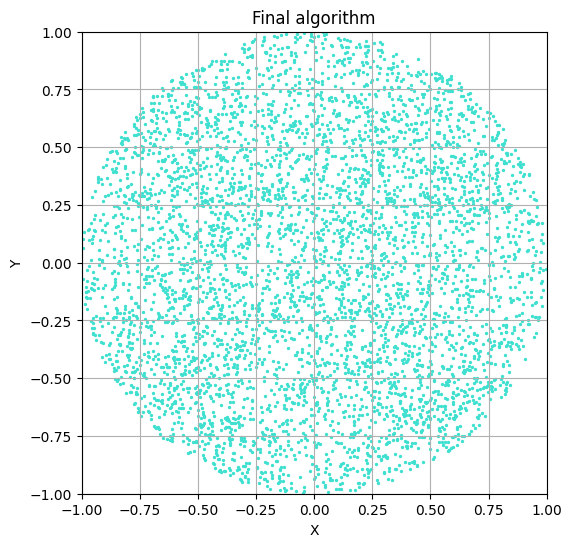

In [32]:
target_r = 1

r_granularity = target_r * 10000

# Function to determine the number of points based on the circumference
def p_acc_based_on_circumference(r):
    return (2 * np.pi * r) / (2 * np.pi * target_r)

# Arrays to store the sampled points
x_points = []
y_points = []

# Number of different radii to sample
for _ in range(r_granularity):
    r = np.random.uniform(0, target_r)

    # Number of points to sample for this radius
    p_acc = p_acc_based_on_circumference(r)

    if np.random.rand() < p_acc:
        # Sample and calculate vars
        dep = np.random.uniform(-r, r)
        indep = np.sqrt(r**2 - dep**2)

        # Mirror on x-axis
        if np.random.rand() > 0.5:
          indep = -indep

        # Assign indep. and dep. var
        x, y = (dep, indep) if np.random.rand() > 0.5 else (indep, dep)

        # Append the point to the arrays
        x_points.append(x)
        y_points.append(y)

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='turquoise', s=2)

# Set the limits and labels
plt.xlim(-target_r, target_r)
plt.ylim(-target_r, target_r)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final algorithm')
plt.grid(True)

# Show the plot
plt.show()

# Extra

The approach introduced in the previous sections works not only for circles but also for other shapes. The different components like @eq-r or the ways of mirroring can be adjusted to create entirely new shapes with uniformly sampled points. I will leave it up to the reader to find the changes made to each of these following shapes, resulting in this variety.

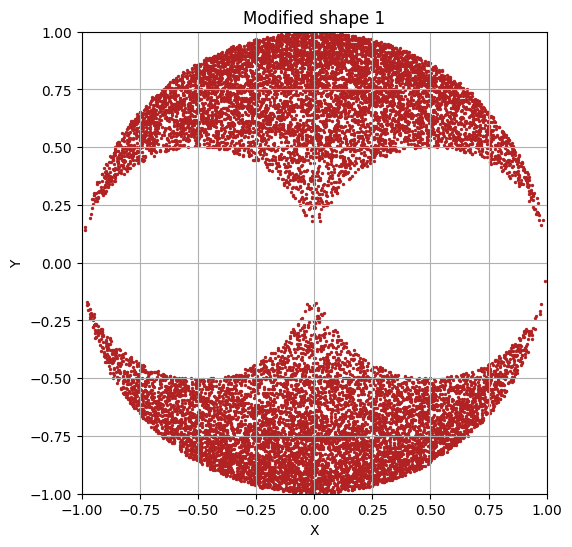

In [28]:
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np

# Function to determine the number of points based on the circumference
def points_based_on_circumference(r, scale=100):
    return int(np.ceil(2 * np.pi * r * scale))

# Arrays to store the sampled points
x_points = []
y_points = []

# Number of different radii to sample
num_radii = 1000

for _ in range(num_radii):
    # Sample r from [0, 1]
    r = np.random.uniform(0, 1)

    # Number of points to sample for this radius
    num_points = points_based_on_circumference(r) // 20

    for _ in range(num_points):
        # Sample x from [-r, r]
        x = np.random.uniform(-r, r)

        # Calculate y based on the circle formula X^2 + Y^2 = r^2
        y = np.sqrt(r - x**2)

        # Randomly decide the sign of y to cover both the top and bottom halves
        if np.random.rand() > 0.5:
            y = -y

        # Append the point to the arrays
        x_points.append(x)
        y_points.append(y)

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='firebrick', s=2)

# Set the limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modified shape 1')
plt.grid(True)

# Show the plot
plt.show()


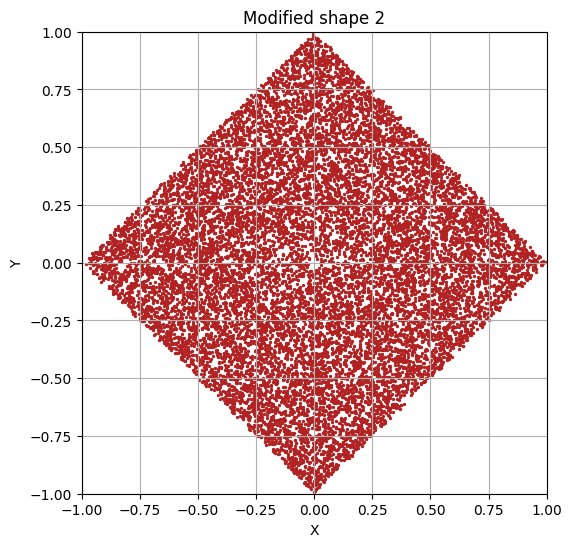

In [29]:
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np

# Function to determine the number of points based on the circumference
def points_based_on_circumference(r, scale=100):
    return int(np.ceil(2 * np.pi * r * scale))

# Arrays to store the sampled points
x_points = []
y_points = []

# Number of different radii to sample
num_radii = 1000

for _ in range(num_radii):
    # Sample r from [0, 1]
    r = np.random.uniform(0, 1)

    # Number of points to sample for this radius
    num_points = points_based_on_circumference(r) // 20

    for _ in range(num_points):
        # Sample x from [-r, r]
        x = np.random.uniform(-r, r)

        # Calculate y based on the modified equation X + Y = r
        y = r - abs(x)

        # Randomly decide the sign of y to cover both the top and bottom halves
        if np.random.rand() > 0.5:
            y = -y

        # Append the point to the arrays
        x_points.append(x)
        y_points.append(y)

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='firebrick', s=2)

# Set the limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modified shape 2')
plt.grid(True)

# Show the plot
plt.show()


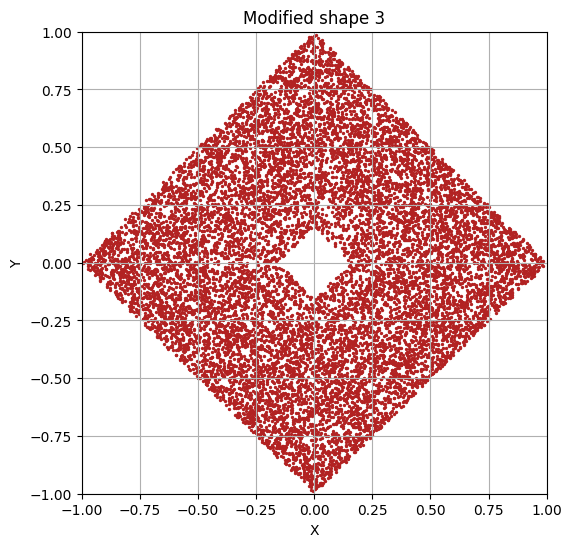

In [30]:
#| code-fold: true

import matplotlib.pyplot as plt
import numpy as np

# Function to determine the number of points based on the circumference
def points_based_on_circumference(r, scale=100):
    return int(np.ceil(2 * np.pi * r * scale))

# Arrays to store the sampled points
x_points = []
y_points = []

# Number of different radii to sample
num_radii = 5000

for _ in range(num_radii):
    # Sample r from [0, 1]
    r = np.random.uniform(0, 1)

    # Number of points to sample for this radius
    num_points = points_based_on_circumference(r) // 100

    for _ in range(num_points):
        # Sample x from [-r, r]
        x = np.random.uniform(-r, r)

        # Calculate y based on the equation x + y = r
        y = r - abs(x)

        # Randomly decide the sign of y to cover both the top and bottom halves
        if np.random.rand() > 0.5:
            y = -y

        # Append the point to the arrays
        x_points.append(x)
        y_points.append(y)

# Create the plot
plt.figure(figsize=(6, 6))
plt.scatter(x_points, y_points, color='firebrick', s=2)

# Set the limits and labels
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modified shape 3')
plt.grid(True)

# Show the plot
plt.show()
